# Webpage Phishing Detection

## Phishing Attack
Phishing is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message. The recipient is then tricked into clicking a malicious link, which can lead to the installation of malware, the freezing of the system as part of a ransomware attack or the revealing of sensitive information.

An attack can have devastating results. For individuals, this includes unauthorized purchases, the stealing of funds, or identify theft.

Moreover, phishing is often used to gain a foothold in corporate or governmental networks as a part of a larger attack, such as an advanced persistent threat (APT) event. In this latter scenario, employees are compromised in order to bypass security perimeters, distribute malware inside a closed environment, or gain privileged access to secured data.

An organization succumbing to such an attack typically sustains severe financial losses in addition to declining market share, reputation, and consumer trust. Depending on scope, a phishing attempt might escalate into a security incident from which a business will have a difficult time recovering.

## Phishing Webpage Features
1) Presence of IP address in URL:Most of the benign sites do not use IP address as an URL to download a webpage. Use of IP address in URL indicates that attacker is trying to steal sensitive information.<br>
2) Presence of @ symbol in URL: Phishers add special symbol @ in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.<br>
3) Number of dots in Hostname: Phishing URLs have many dots in URL.<br>
4) Prefix or Suffix separated by (-) to domain: If domain name separated by dash (-) symbol then feature is set to 1 else to 0. The dash symbol is rarely used in legitimate URLs. Phishers add dash symbol (-) to the domain name so that users feel that they are dealing with a legitimate webpage.<br>
5) URL redirection: The existence of “//” within the URL path means that the user will be redirected to another website.<br>
6) HTTPS token in URL: If HTTPS token present in URL then the feature is set to 1 else to 0. Phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.<br>
7) Information submission to Email: Phisher might use “mail()” or “mailto:” functions to redirect the user’s information to his personal email. If such functions are present in the URL then feature is set to 1 else to 0.<br>
8) URL Shortening Services “TinyURL”: TinyURL service allows phisher to hide long phishing URL by making it short. The goal is to redirect user to phishing websites.<br>
9) Length of Host name: Average length of the benign URLs is found to be a 25.<br>
10) Number of slash in URL: The number of slashes in benign URLs is found to be a 5.<br>
and many more phishing webpage feature are present.

### REFERENCES
1:https://www.researchgate.net/publication/328541785_Phishing_Website_Detection_using_Machine_Learning_Algorithms 2:http://eprints.hud.ac.uk/id/eprint/24330/6/MohammadPhishing14July2015.pdf

### Dataset - https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset


## Importing the libraries

In [113]:
import numpy as np # linear algebra
import pandas as pd #
import random
import sys
import os
!pip install tldextract -q
import tldextract
import warnings
import re
import eli5
from typing import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import matplotlib.pyplot as plt
import seaborn as sns 
from urllib.parse import urlparse
from nltk.tokenize import RegexpTokenizer

warnings.filterwarnings("ignore")

In [114]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
tldextract.extract('http://forums.news.cnn.com/')

## Importing the dataset

In [3]:
#df=pd.read_csv(r'/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv')
#df.head()

In [116]:
df=pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [117]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [118]:
drop_columns=['length_url','nb_or','nb_colon', 'nb_underscore', 'nb_percent','nb_dslash','nb_dollar',
 'nb_space','nb_star','nb_comma','ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'dns_record','avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia','web_traffic', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain','nb_tilde','nb_slash','nb_at', 'nb_semicolumn', 'nb_hyphens',]

In [119]:
df.drop(drop_columns, axis=1, inplace=True)

In [120]:
df

,url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,ratio_digits_url,domain_registration_length,domain_age,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,19,0,3,0,0,0,1,0,0,1,0.000000,45,-1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,23,1,1,0,0,0,0,0,0,1,0.220779,77,5767,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,50,1,4,1,2,3,0,1,0,0,0.150794,14,4004,1,0,phishing
3,http://rgipt.ac.in,11,0,2,0,0,0,0,0,0,1,0.000000,62,-1,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,15,0,2,0,0,0,1,0,0,1,0.000000,224,8175,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,17,0,2,0,0,0,1,0,0,1,0.000000,448,5396,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,18,0,5,1,0,1,1,1,0,1,0.023810,211,6728,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,16,1,2,1,0,1,1,0,0,0,0.142857,2809,8515,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,30,0,2,0,0,0,1,0,0,1,0.000000,85,2836,0,4,legitimate


## Phishing Feature Extraction

In [121]:
def parse_url(url: str) -> Optional[Dict[str, str]]:
    try:
        no_scheme = not url.startswith('https://') and not url.startswith('http://')
        if no_scheme:
            parsed_url = urlparse(f"http://{url}")
            return {
                "scheme": None, # not established a value for this
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
        else:
            parsed_url = urlparse(url)
            return {
                "scheme": parsed_url.scheme,
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
    except:
        return None

In [122]:
df["parsed_url"] = df.url.apply(parse_url)
df

,url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,ratio_digits_url,domain_registration_length,domain_age,google_index,page_rank,status,parsed_url
0,http://www.crestonwood.com/router.php,19,0,3,0,0,0,1,0,0,1,0.000000,45,-1,1,4,legitimate,"{'scheme': 'http', 'netloc': 'www.crestonwood...."
1,http://shadetreetechnology.com/V4/validation/a...,23,1,1,0,0,0,0,0,0,1,0.220779,77,5767,1,2,phishing,"{'scheme': 'http', 'netloc': 'shadetreetechnol..."
2,https://support-appleld.com.secureupdate.duila...,50,1,4,1,2,3,0,1,0,0,0.150794,14,4004,1,0,phishing,"{'scheme': 'https', 'netloc': 'support-appleld..."
3,http://rgipt.ac.in,11,0,2,0,0,0,0,0,0,1,0.000000,62,-1,0,3,legitimate,"{'scheme': 'http', 'netloc': 'rgipt.ac.in', 'p..."
4,http://www.iracing.com/tracks/gateway-motorspo...,15,0,2,0,0,0,1,0,0,1,0.000000,224,8175,0,6,legitimate,"{'scheme': 'http', 'netloc': 'www.iracing.com'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,17,0,2,0,0,0,1,0,0,1,0.000000,448,5396,0,6,legitimate,"{'scheme': 'http', 'netloc': 'www.fontspace.co..."
11426,http://www.budgetbots.com/server.php/Server%20...,18,0,5,1,0,1,1,1,0,1,0.023810,211,6728,1,0,phishing,"{'scheme': 'http', 'netloc': 'www.budgetbots.c..."
11427,https://www.facebook.com/Interactive-Televisio...,16,1,2,1,0,1,1,0,0,0,0.142857,2809,8515,1,10,legitimate,"{'scheme': 'https', 'netloc': 'www.facebook.co..."
11428,http://www.mypublicdomainpictures.com/,30,0,2,0,0,0,1,0,0,1,0.000000,85,2836,0,4,legitimate,"{'scheme': 'http', 'netloc': 'www.mypublicdoma..."


In [123]:
df = pd.concat([
    df.drop(['parsed_url'], axis=1),
    df['parsed_url'].apply(pd.Series)
], axis=1)
df

,url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,...,domain_age,google_index,page_rank,status,scheme,netloc,path,params,query,fragment
0,http://www.crestonwood.com/router.php,19,0,3,0,0,0,1,0,0,...,-1,1,4,legitimate,http,www.crestonwood.com,/router.php,,,
1,http://shadetreetechnology.com/V4/validation/a...,23,1,1,0,0,0,0,0,0,...,5767,1,2,phishing,http,shadetreetechnology.com,/V4/validation/a111aedc8ae390eabcfa130e041a10a4,,,
2,https://support-appleld.com.secureupdate.duila...,50,1,4,1,2,3,0,1,0,...,4004,1,0,phishing,https,support-appleld.com.secureupdate.duilawyeryork...,/ap/89e6a3b4b063b8d/,,cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,
3,http://rgipt.ac.in,11,0,2,0,0,0,0,0,0,...,-1,0,3,legitimate,http,rgipt.ac.in,,,,
4,http://www.iracing.com/tracks/gateway-motorspo...,15,0,2,0,0,0,1,0,0,...,8175,0,6,legitimate,http,www.iracing.com,/tracks/gateway-motorsports-park/,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,17,0,2,0,0,0,1,0,0,...,5396,0,6,legitimate,http,www.fontspace.com,/category/blackletter,,,
11426,http://www.budgetbots.com/server.php/Server%20...,18,0,5,1,0,1,1,1,0,...,6728,1,0,phishing,http,www.budgetbots.com,/server.php/Server%20update/index.php,,email=USER@DOMAIN.com,
11427,https://www.facebook.com/Interactive-Televisio...,16,1,2,1,0,1,1,0,0,...,8515,1,10,legitimate,https,www.facebook.com,/Interactive-Television-Pvt-Ltd-Group-M-100230...,,ref=page_internal,
11428,http://www.mypublicdomainpictures.com/,30,0,2,0,0,0,1,0,0,...,2836,0,4,legitimate,http,www.mypublicdomainpictures.com,/,,,


In [124]:
#remove row where netlocation is null
df = df[~df.netloc.isnull()]
df

,url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,...,domain_age,google_index,page_rank,status,scheme,netloc,path,params,query,fragment
0,http://www.crestonwood.com/router.php,19,0,3,0,0,0,1,0,0,...,-1,1,4,legitimate,http,www.crestonwood.com,/router.php,,,
1,http://shadetreetechnology.com/V4/validation/a...,23,1,1,0,0,0,0,0,0,...,5767,1,2,phishing,http,shadetreetechnology.com,/V4/validation/a111aedc8ae390eabcfa130e041a10a4,,,
2,https://support-appleld.com.secureupdate.duila...,50,1,4,1,2,3,0,1,0,...,4004,1,0,phishing,https,support-appleld.com.secureupdate.duilawyeryork...,/ap/89e6a3b4b063b8d/,,cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,
3,http://rgipt.ac.in,11,0,2,0,0,0,0,0,0,...,-1,0,3,legitimate,http,rgipt.ac.in,,,,
4,http://www.iracing.com/tracks/gateway-motorspo...,15,0,2,0,0,0,1,0,0,...,8175,0,6,legitimate,http,www.iracing.com,/tracks/gateway-motorsports-park/,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,17,0,2,0,0,0,1,0,0,...,5396,0,6,legitimate,http,www.fontspace.com,/category/blackletter,,,
11426,http://www.budgetbots.com/server.php/Server%20...,18,0,5,1,0,1,1,1,0,...,6728,1,0,phishing,http,www.budgetbots.com,/server.php/Server%20update/index.php,,email=USER@DOMAIN.com,
11427,https://www.facebook.com/Interactive-Televisio...,16,1,2,1,0,1,1,0,0,...,8515,1,10,legitimate,https,www.facebook.com,/Interactive-Television-Pvt-Ltd-Group-M-100230...,,ref=page_internal,
11428,http://www.mypublicdomainpictures.com/,30,0,2,0,0,0,1,0,0,...,2836,0,4,legitimate,http,www.mypublicdomainpictures.com,/,,,


In [125]:
df["length"] = df.url.str.len()

In [126]:
#count number of @
df['no_of_@'] = df.url.str.count('@')

In [127]:
#extraction of top level domain which is present in netlocation
df['tld'] = df.netloc.apply(lambda nl: tldextract.extract(nl).suffix)
df['tld'] = df['tld'].replace('','None')

In [128]:
df

,url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,...,status,scheme,netloc,path,params,query,fragment,length,no_of_@,tld
0,http://www.crestonwood.com/router.php,19,0,3,0,0,0,1,0,0,...,legitimate,http,www.crestonwood.com,/router.php,,,,37,0,com
1,http://shadetreetechnology.com/V4/validation/a...,23,1,1,0,0,0,0,0,0,...,phishing,http,shadetreetechnology.com,/V4/validation/a111aedc8ae390eabcfa130e041a10a4,,,,77,0,com
2,https://support-appleld.com.secureupdate.duila...,50,1,4,1,2,3,0,1,0,...,phishing,https,support-appleld.com.secureupdate.duilawyeryork...,/ap/89e6a3b4b063b8d/,,cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,,126,0,com
3,http://rgipt.ac.in,11,0,2,0,0,0,0,0,0,...,legitimate,http,rgipt.ac.in,,,,,18,0,ac.in
4,http://www.iracing.com/tracks/gateway-motorspo...,15,0,2,0,0,0,1,0,0,...,legitimate,http,www.iracing.com,/tracks/gateway-motorsports-park/,,,,55,0,com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,17,0,2,0,0,0,1,0,0,...,legitimate,http,www.fontspace.com,/category/blackletter,,,,45,0,com
11426,http://www.budgetbots.com/server.php/Server%20...,18,0,5,1,0,1,1,1,0,...,phishing,http,www.budgetbots.com,/server.php/Server%20update/index.php,,email=USER@DOMAIN.com,,84,1,com
11427,https://www.facebook.com/Interactive-Televisio...,16,1,2,1,0,1,1,0,0,...,legitimate,https,www.facebook.com,/Interactive-Television-Pvt-Ltd-Group-M-100230...,,ref=page_internal,,105,0,com
11428,http://www.mypublicdomainpictures.com/,30,0,2,0,0,0,1,0,0,...,legitimate,http,www.mypublicdomainpictures.com,/,,,,38,0,com


In [129]:
#using regular expression to match presence of ip address
df["is_ip"] = df.netloc.str.match(r"\d+\.\d+\.\d+\.\d+")

In [130]:
df['domain_hyphens'] = df.netloc.str.count('-')
df['domain_underscores'] = df.netloc.str.count('_')
df['path_hyphens'] = df.path.str.count('-')
df['path_underscores'] = df.path.str.count('_')
df['slashes'] = df.path.str.count('/')
df['full_stops'] = df.path.str.count('.')

In [131]:
# in netlocation here we are finding the number of subdomain present which are separated by '.'
def get_num_subdomains(netloc: str) -> int:
    subdomain = tldextract.extract(netloc).subdomain 
    if subdomain == "":
        return 0
    return subdomain.count('.') + 1

df['num_subdomains'] = df['netloc'].apply(lambda net: get_num_subdomains(net))

In [132]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
def tokenize_domain(netloc: str) -> str:
    split_domain = tldextract.extract(netloc)
    no_tld = str(split_domain.subdomain +'.'+ split_domain.domain)
    return " ".join(map(str,tokenizer.tokenize(no_tld)))
         
df['domain_tokens'] = df['netloc'].apply(lambda net: tokenize_domain(net))
df['path_tokens'] = df['path'].apply(lambda path: " ".join(map(str,tokenizer.tokenize(path))))


In [133]:
df

,url,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,...,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
0,http://www.crestonwood.com/router.php,19,0,3,0,0,0,1,0,0,...,False,0,0,0,0,1,11,1,www crestonwood,router php
1,http://shadetreetechnology.com/V4/validation/a...,23,1,1,0,0,0,0,0,0,...,False,0,0,0,0,3,47,0,shadetreetechnology,V validation a aedc ae eabcfa e a a
2,https://support-appleld.com.secureupdate.duila...,50,1,4,1,2,3,0,1,0,...,False,1,0,0,0,3,20,3,support appleld com secureupdate duilawyeryork,ap e a b b b d
3,http://rgipt.ac.in,11,0,2,0,0,0,0,0,0,...,False,0,0,0,0,0,0,0,rgipt,
4,http://www.iracing.com/tracks/gateway-motorspo...,15,0,2,0,0,0,1,0,0,...,False,0,0,2,0,3,33,1,www iracing,tracks gateway motorsports park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,17,0,2,0,0,0,1,0,0,...,False,0,0,0,0,2,21,1,www fontspace,category blackletter
11426,http://www.budgetbots.com/server.php/Server%20...,18,0,5,1,0,1,1,1,0,...,False,0,0,0,0,3,37,1,www budgetbots,server php Server update index php
11427,https://www.facebook.com/Interactive-Televisio...,16,1,2,1,0,1,1,0,0,...,False,0,0,6,0,3,63,1,www facebook,Interactive Television Pvt Ltd Group M photos
11428,http://www.mypublicdomainpictures.com/,30,0,2,0,0,0,1,0,0,...,False,0,0,0,0,1,1,1,www mypublicdomainpictures,


In [134]:
df.columns.tolist()

['url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_www',
 'nb_com',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'domain_registration_length',
 'domain_age',
 'google_index',
 'page_rank',
 'status',
 'scheme',
 'netloc',
 'path',
 'params',
 'query',
 'fragment',
 'length',
 'no_of_@',
 'tld',
 'is_ip',
 'domain_hyphens',
 'domain_underscores',
 'path_hyphens',
 'path_underscores',
 'slashes',
 'full_stops',
 'num_subdomains',
 'domain_tokens',
 'path_tokens']

In [135]:
df.drop('url', axis=1, inplace=True)
df.drop('scheme', axis=1, inplace=True)
df.drop('netloc', axis=1, inplace=True)
df.drop('path', axis=1, inplace=True)
df.drop('params', axis=1, inplace=True)
df.drop('query', axis=1, inplace=True)
df.drop('fragment', axis=1, inplace=True)

In [136]:
df.columns.tolist()

['length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_www',
 'nb_com',
 'http_in_path',
 'https_token',
 'ratio_digits_url',
 'domain_registration_length',
 'domain_age',
 'google_index',
 'page_rank',
 'status',
 'length',
 'no_of_@',
 'tld',
 'is_ip',
 'domain_hyphens',
 'domain_underscores',
 'path_hyphens',
 'path_underscores',
 'slashes',
 'full_stops',
 'num_subdomains',
 'domain_tokens',
 'path_tokens']

In [137]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing column (label encoded values of status_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['status']]).toarray(),columns=['status legitimate','status phishing'])
# merge with main df on key values
df1 = df.join(enc_df)
df1

,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,...,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens,status legitimate,status phishing
0,19,0,3,0,0,0,1,0,0,1,...,0,0,0,1,11,1,www crestonwood,router php,1.0,0.0
1,23,1,1,0,0,0,0,0,0,1,...,0,0,0,3,47,0,shadetreetechnology,V validation a aedc ae eabcfa e a a,0.0,1.0
2,50,1,4,1,2,3,0,1,0,0,...,0,0,0,3,20,3,support appleld com secureupdate duilawyeryork,ap e a b b b d,0.0,1.0
3,11,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,rgipt,,1.0,0.0
4,15,0,2,0,0,0,1,0,0,1,...,0,2,0,3,33,1,www iracing,tracks gateway motorsports park,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,17,0,2,0,0,0,1,0,0,1,...,0,0,0,2,21,1,www fontspace,category blackletter,1.0,0.0
11426,18,0,5,1,0,1,1,1,0,1,...,0,0,0,3,37,1,www budgetbots,server php Server update index php,0.0,1.0
11427,16,1,2,1,0,1,1,0,0,0,...,0,6,0,3,63,1,www facebook,Interactive Television Pvt Ltd Group M photos,1.0,0.0
11428,30,0,2,0,0,0,1,0,0,1,...,0,0,0,1,1,1,www mypublicdomainpictures,,1.0,0.0


In [138]:
df1.drop('status legitimate', axis=1, inplace=True)#legitimate=0.0,phishing=1.0
df1.drop('status', axis=1, inplace=True)

In [139]:
df1

,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,...,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens,status phishing
0,19,0,3,0,0,0,1,0,0,1,...,0,0,0,0,1,11,1,www crestonwood,router php,0.0
1,23,1,1,0,0,0,0,0,0,1,...,0,0,0,0,3,47,0,shadetreetechnology,V validation a aedc ae eabcfa e a a,1.0
2,50,1,4,1,2,3,0,1,0,0,...,1,0,0,0,3,20,3,support appleld com secureupdate duilawyeryork,ap e a b b b d,1.0
3,11,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,rgipt,,0.0
4,15,0,2,0,0,0,1,0,0,1,...,0,0,2,0,3,33,1,www iracing,tracks gateway motorsports park,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,17,0,2,0,0,0,1,0,0,1,...,0,0,0,0,2,21,1,www fontspace,category blackletter,0.0
11426,18,0,5,1,0,1,1,1,0,1,...,0,0,0,0,3,37,1,www budgetbots,server php Server update index php,1.0
11427,16,1,2,1,0,1,1,0,0,0,...,0,0,6,0,3,63,1,www facebook,Interactive Television Pvt Ltd Group M photos,0.0
11428,30,0,2,0,0,0,1,0,0,1,...,0,0,0,0,1,1,1,www mypublicdomainpictures,,0.0


## Exploratory data analysis

<AxesSubplot:>

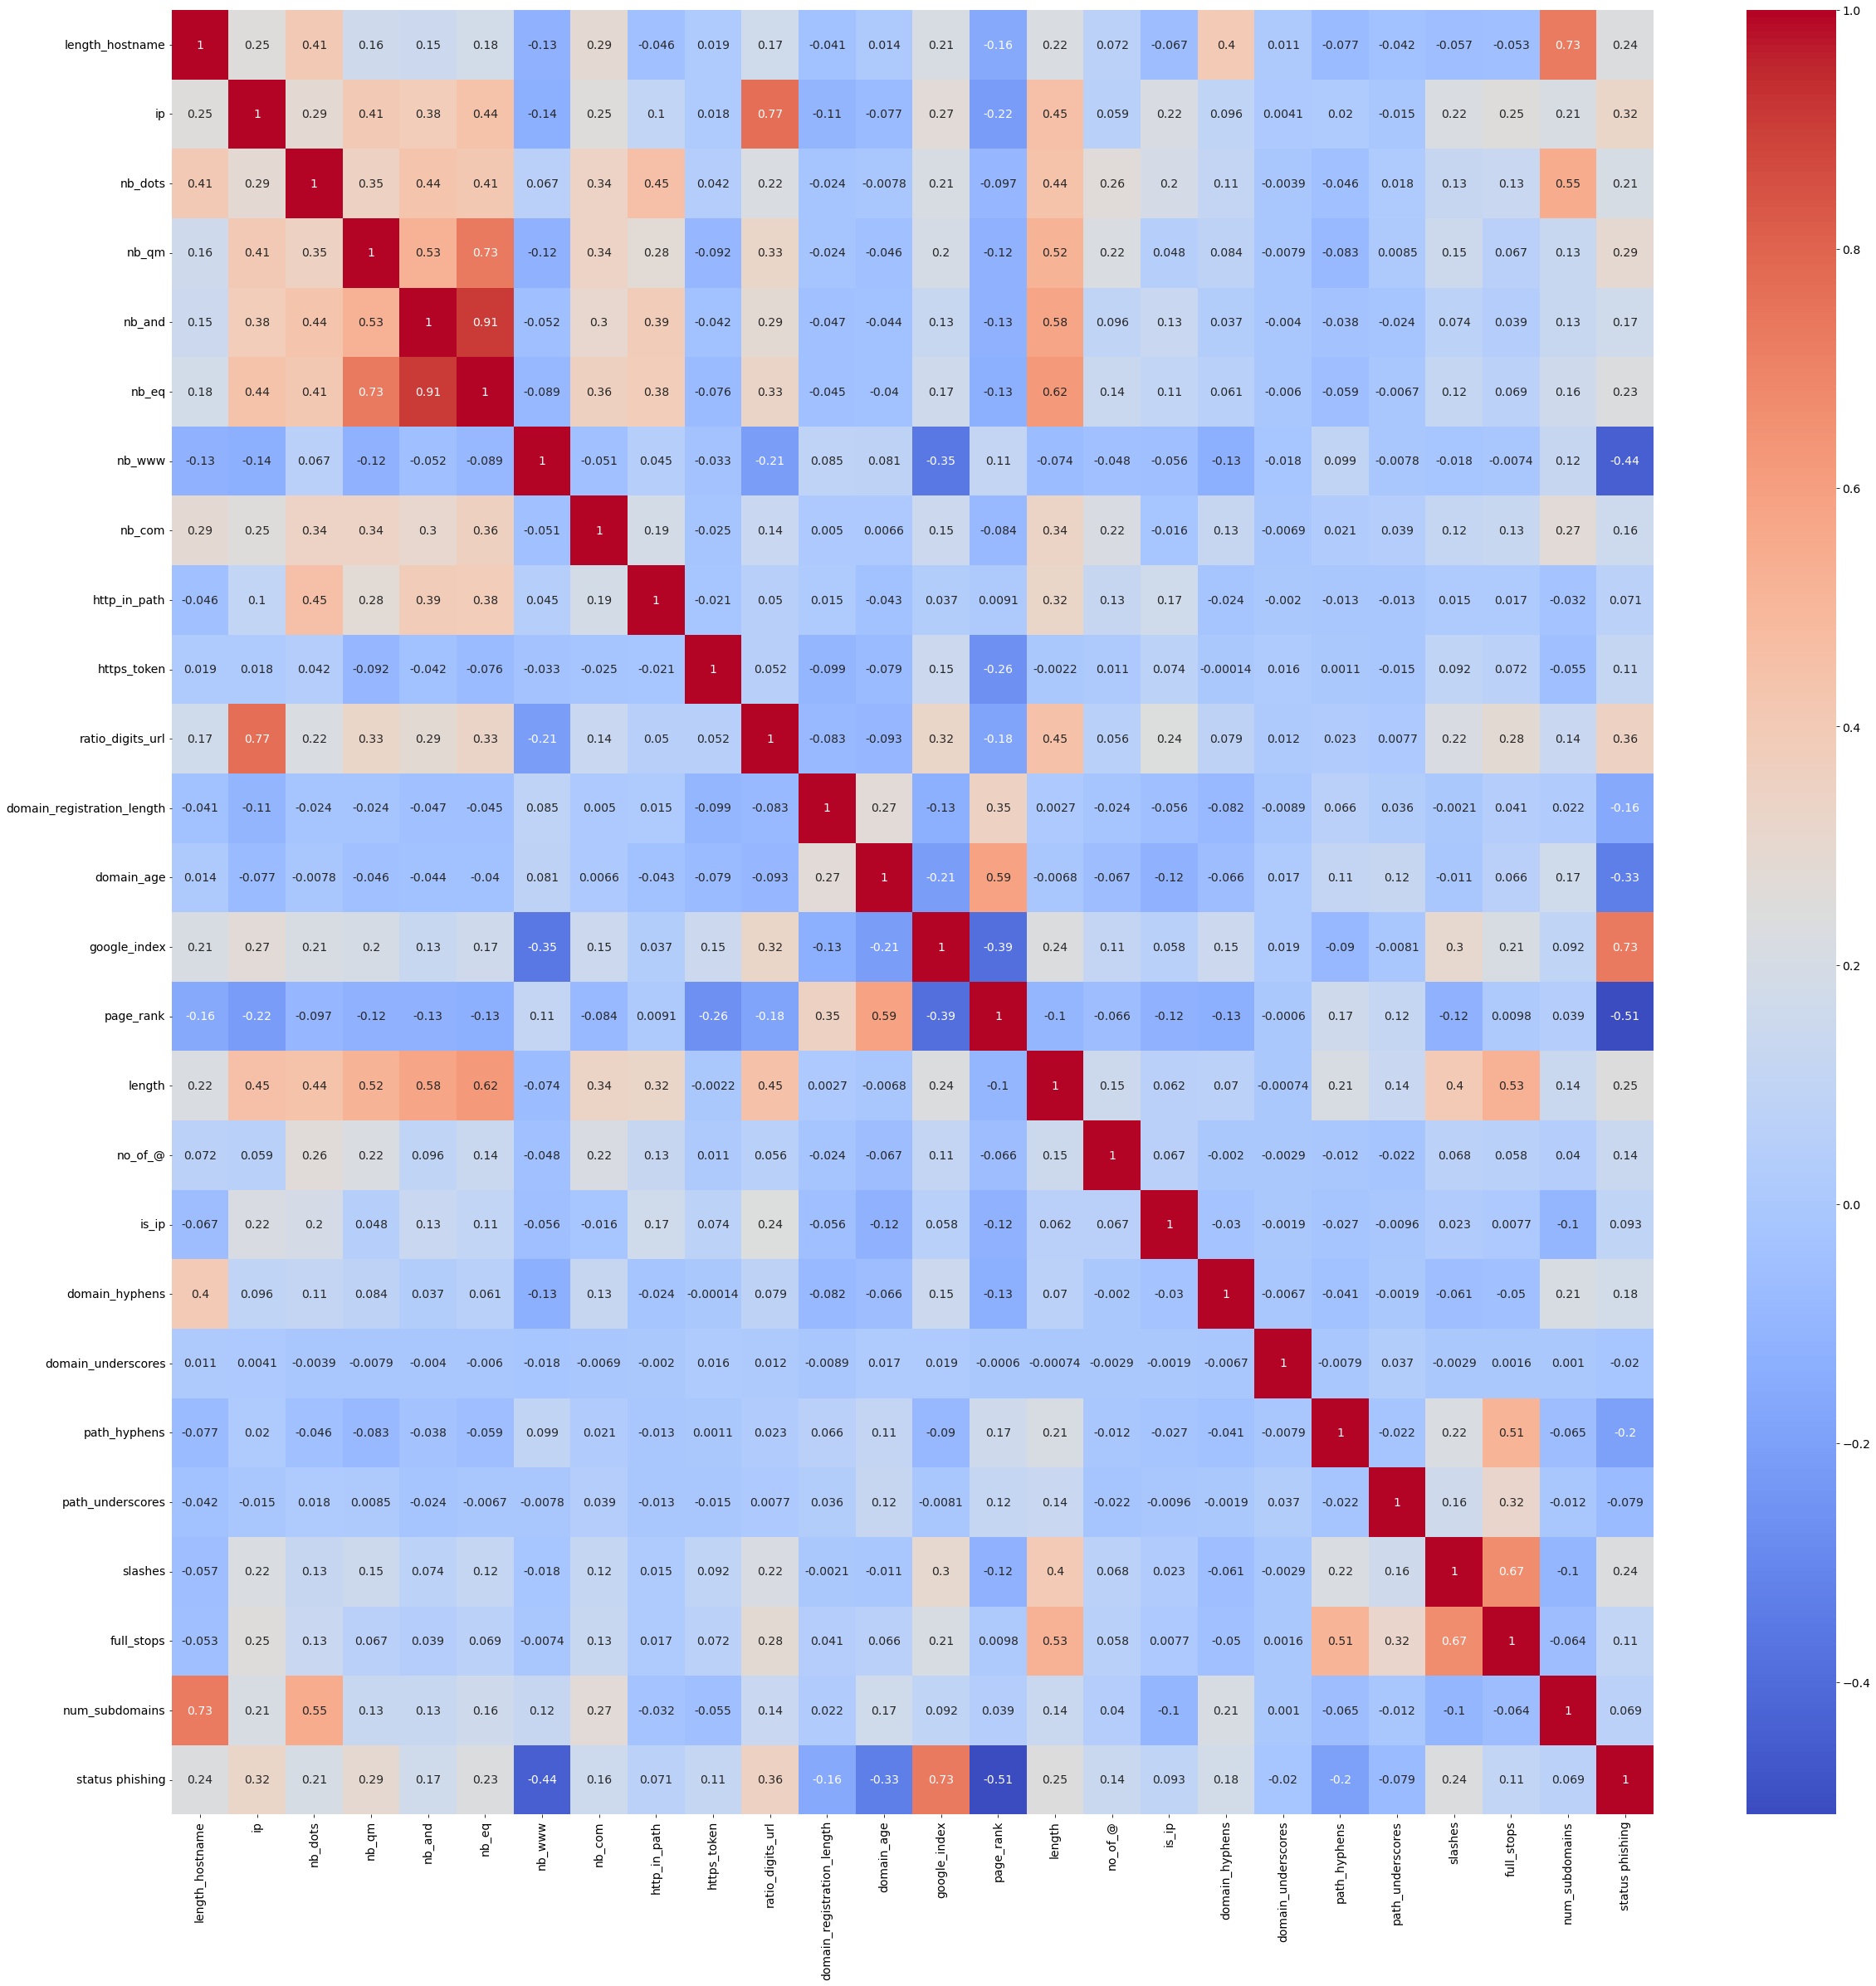

In [140]:
plt.figure(figsize=(40,40))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='status phishing', ylabel='count'>

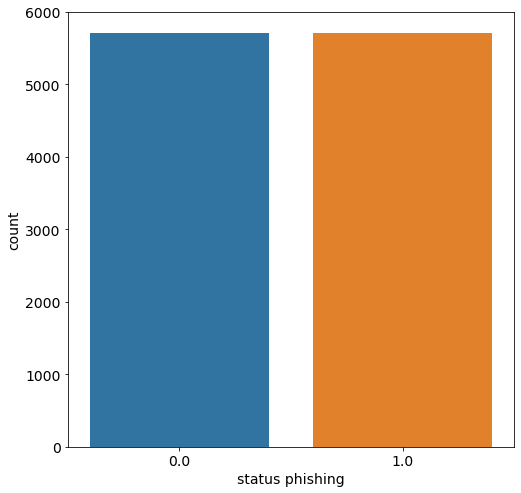

In [141]:
plt.figure(figsize = (8, 8))
sns.countplot(df1['status phishing'])

Observation:
dataset given is balanced

### IP

<Figure size 720x720 with 0 Axes>

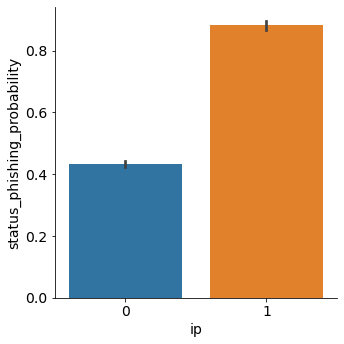

In [142]:
plt.figure(figsize = (10, 10))
graph=sns.factorplot(x = 'ip', y = "status phishing", data = df1,kind ='bar')
graph=graph.set_ylabels("status_phishing_probability")

In [143]:
df1[['ip', "status phishing"]].groupby("ip").mean()

,status phishing
ip,
0,0.432279
1,0.882045


### number of subdomains

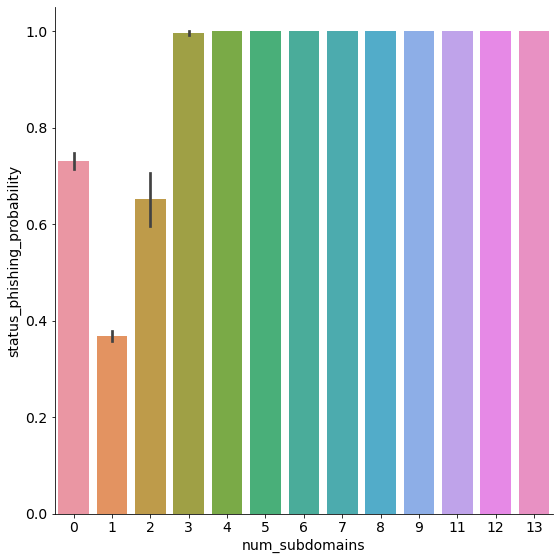

In [144]:
graph1 = sns.factorplot(x = "num_subdomains", y = "status phishing", data = df1, kind = "bar", size = 8)
graph1 = graph1.set_ylabels("status_phishing_probability")

In [145]:
df1[['num_subdomains', "status phishing"]].groupby("num_subdomains").mean()

,status phishing
num_subdomains,
0,0.731269
1,0.367565
2,0.651613
3,0.996743
4,1.000000
5,1.000000
6,1.000000
7,1.000000
8,1.000000


Observation:
    If number of subdomain is 3 or greater than 3 then that url will be Phishing Url.

# Page rank

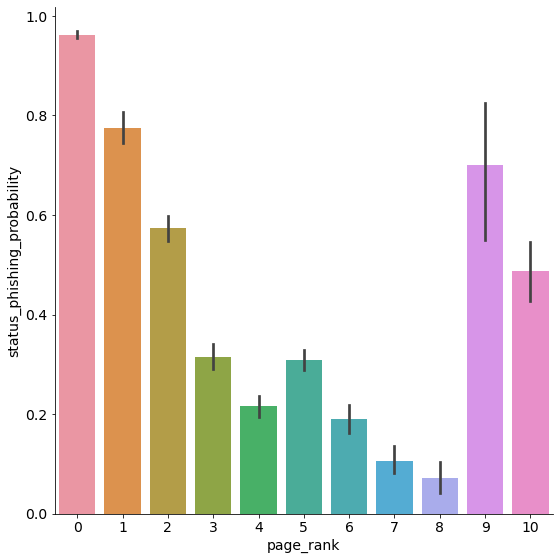

In [146]:
graph2 = sns.factorplot(x = "page_rank", y = "status phishing", data = df1, kind = "bar", size = 8)
graph2 = graph2.set_ylabels("status_phishing_probability")

In [147]:
df1[['page_rank', "status phishing"]].groupby('page_rank').mean()

,status phishing
page_rank,
0,0.962116
1,0.775510
2,0.573084
3,0.314935
4,0.215942
5,0.308216
6,0.189821
7,0.106090
8,0.072519


### Path hyphens

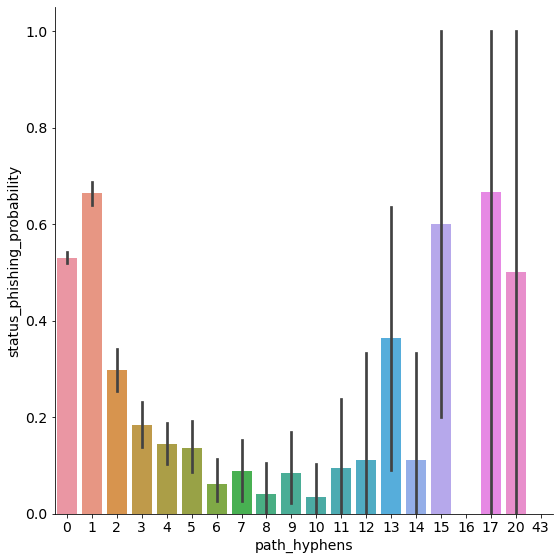

In [148]:
graph3 = sns.factorplot(x = "path_hyphens", y = "status phishing", data = df1, kind = "bar", size = 8)
graph3 = graph3.set_ylabels("status_phishing_probability")

In [149]:
df1[['path_hyphens', "status phishing"]].groupby('path_hyphens').mean()

,status phishing
path_hyphens,
0,0.530842
1,0.663988
2,0.298539
3,0.183051
4,0.145299
5,0.135802
6,0.061404
7,0.088608
8,0.041667


In [150]:
df1_y = df1['status phishing'] 
df1.drop('status phishing', axis=1, inplace=True) 

In [151]:
df1_y 

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
11425    0.0
11426    1.0
11427    0.0
11428    0.0
11429    1.0
Name: status phishing, Length: 11430, dtype: float64

In [152]:
df1

,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,...,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
0,19,0,3,0,0,0,1,0,0,1,...,False,0,0,0,0,1,11,1,www crestonwood,router php
1,23,1,1,0,0,0,0,0,0,1,...,False,0,0,0,0,3,47,0,shadetreetechnology,V validation a aedc ae eabcfa e a a
2,50,1,4,1,2,3,0,1,0,0,...,False,1,0,0,0,3,20,3,support appleld com secureupdate duilawyeryork,ap e a b b b d
3,11,0,2,0,0,0,0,0,0,1,...,False,0,0,0,0,0,0,0,rgipt,
4,15,0,2,0,0,0,1,0,0,1,...,False,0,0,2,0,3,33,1,www iracing,tracks gateway motorsports park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,17,0,2,0,0,0,1,0,0,1,...,False,0,0,0,0,2,21,1,www fontspace,category blackletter
11426,18,0,5,1,0,1,1,1,0,1,...,False,0,0,0,0,3,37,1,www budgetbots,server php Server update index php
11427,16,1,2,1,0,1,1,0,0,0,...,False,0,0,6,0,3,63,1,www facebook,Interactive Television Pvt Ltd Group M photos
11428,30,0,2,0,0,0,1,0,0,1,...,False,0,0,0,0,1,1,1,www mypublicdomainpictures,


In [153]:
class Converter(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, data_frame):
        return data_frame.values.ravel()

## Splitting the dataset into the Training set and Test set

In [154]:
X_train, X_test, y_train, y_test = train_test_split(df1, df1_y, test_size = 0.25, random_state = 0)

In [155]:
X_train

,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,...,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
10093,19,0,2,0,0,0,1,0,0,1,...,False,1,0,0,0,1,1,1,www tsv birkenau,
2640,17,0,2,1,1,2,0,0,0,1,...,False,0,0,0,1,2,18,1,store mdcgate,market app detail
10729,21,0,5,0,0,0,1,1,0,0,...,False,0,0,4,0,1,47,1,www notebookcheck,Comparison of Laptop Graphics Cards html
1704,23,0,2,0,0,0,1,0,0,0,...,False,0,0,0,0,1,1,1,www littlerockstore,
2485,15,1,7,1,3,2,0,0,0,1,...,False,0,0,1,0,10,85,0,chronicle,wp wp content themes twentythirteen genericons...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,20,0,3,0,0,0,1,0,0,1,...,False,0,0,0,0,3,25,1,www mediacollege,video shots closeup html
3264,19,0,4,0,0,0,1,0,0,1,...,False,1,0,0,0,5,38,2,www ece k state,people faculty scoglio files jota pdf
9845,8,0,2,1,0,0,0,0,0,1,...,False,0,0,1,2,5,61,0,elomo,wp includes SimplePie Net access onedrive vali...
10799,20,0,3,0,0,0,0,0,0,1,...,False,0,0,0,0,2,21,1,secureadd goshly,Preview Outlook aspx


In [156]:
X_test

,length_hostname,ip,nb_dots,nb_qm,nb_and,nb_eq,nb_www,nb_com,http_in_path,https_token,...,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
6406,25,0,2,0,0,0,1,0,0,0,...,False,0,0,0,0,1,1,1,www disabilitysecrets,
4266,12,0,3,0,0,0,0,0,0,1,...,False,0,0,0,0,4,35,0,mnsglobal,a login mobile de tanValidate php
1238,14,0,1,0,0,0,0,0,0,1,...,False,0,0,0,0,2,4,0,idealcaisse,cs
2646,20,0,3,0,0,0,0,0,0,1,...,False,0,0,0,0,1,12,1,xmley codesandbox,index html
2217,14,0,2,0,0,0,1,0,0,1,...,False,0,0,2,0,5,43,1,www amsoil,shop by product transmission fluid manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,21,0,2,0,0,0,0,0,0,1,...,False,0,0,0,0,3,22,1,beta kenaidanceta,postamok fc source
7664,21,0,2,0,0,0,0,0,0,1,...,False,0,0,0,0,2,16,0,indiankitchenfood,menu status php
7715,12,0,2,0,0,0,1,0,0,0,...,False,0,0,0,0,1,1,1,www nsls,
7785,25,0,2,0,0,0,1,0,0,0,...,False,0,0,0,0,1,1,1,www tandartsinformatie,


## Feature Scaling and Training the models on the Training set

In [157]:
df1.dtypes

length_hostname                 int64
ip                              int64
nb_dots                         int64
nb_qm                           int64
nb_and                          int64
nb_eq                           int64
nb_www                          int64
nb_com                          int64
http_in_path                    int64
https_token                     int64
ratio_digits_url              float64
domain_registration_length      int64
domain_age                      int64
google_index                    int64
page_rank                       int64
length                          int64
no_of_@                         int64
tld                            object
is_ip                            bool
domain_hyphens                  int64
domain_underscores              int64
path_hyphens                    int64
path_underscores                int64
slashes                         int64
full_stops                      int64
num_subdomains                  int64
domain_token

In [158]:
numeric_columns = df1.select_dtypes(include='number').columns
numeric_columns

Index(['length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_and', 'nb_eq',
       'nb_www', 'nb_com', 'http_in_path', 'https_token', 'ratio_digits_url',
       'domain_registration_length', 'domain_age', 'google_index', 'page_rank',
       'length', 'no_of_@', 'domain_hyphens', 'domain_underscores',
       'path_hyphens', 'path_underscores', 'slashes', 'full_stops',
       'num_subdomains'],
      dtype='object')

In [159]:
numeric_features = ['length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_and', 'nb_eq',
       'nb_www', 'nb_com', 'http_in_path', 'https_token', 'ratio_digits_url',
       'domain_registration_length', 'domain_age', 'google_index', 'page_rank',
       'length', 'no_of_@', 'domain_hyphens', 'domain_underscores',
       'path_hyphens', 'path_underscores', 'slashes', 'full_stops',
       'num_subdomains']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

In [160]:
categorical_features = ['tld', 'is_ip']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [161]:
vectorizer_features = ['domain_tokens','path_tokens']
vectorizer_transformer = Pipeline(steps=[
    ('con', Converter()),
    ('tf', TfidfVectorizer())])

In [162]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('domvec', vectorizer_transformer, ['domain_tokens']),
        ('pathvec', vectorizer_transformer, ['path_tokens'])
    ])
svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

log_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
deci_clf=Pipeline([('preprocessor', preprocessor),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('preprocessor', preprocessor),
                                
                     ('rf_classifier',RandomForestClassifier())])

In [163]:
svc_clf.fit(X_train, y_train)
log_clf.fit(X_train, y_train)
deci_clf.fit(X_train, y_train)
pipeline_randomforest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['length_hostname', 'ip',
                                                   'nb_dots', 'nb_qm', 'nb_and',
                                                   'nb_eq', 'nb_www', 'nb_com',
                                                   'http_in_path',
                                                   'https_token',
                                                   'ratio_digits_url',
                                                   'domain_registration_length',
                                                   'domain_age', 'google_index',
                                                   'page_rank', 'length',
                                                   'no_of_@', 'domain_

## Predicting the Test set results and Visualising the Confusion Matrix of results

In [164]:
def results(name: str, model: BaseEstimator) -> None:
    preds = model.predict(X_test)

    print(name + " score: %.3f" % model.score(X_test, y_test))
    print(classification_report(y_test, preds))
    labels = ['Good', 'Bad']

    conf_matrix = confusion_matrix(y_test, preds)

    font = {'family' : 'normal',
            'size'   : 14}

    plt.rc('font', **font)
    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Greens')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


SVC score: 0.958
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1430
         1.0       0.96      0.96      0.96      1428

    accuracy                           0.96      2858
   macro avg       0.96      0.96      0.96      2858
weighted avg       0.96      0.96      0.96      2858

Logistic Regression score: 0.950
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1430
         1.0       0.96      0.94      0.95      1428

    accuracy                           0.95      2858
   macro avg       0.95      0.95      0.95      2858
weighted avg       0.95      0.95      0.95      2858

dt_classifier score: 0.947
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1430
         1.0       0.94      0.95      0.95      1428

    accuracy                           0.95      2858
   macro avg       0.95      0.95      0.95      28

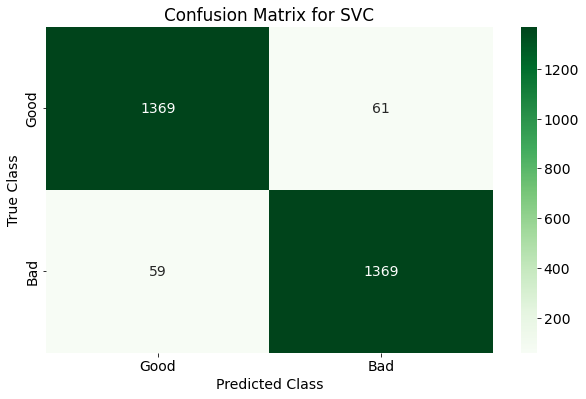

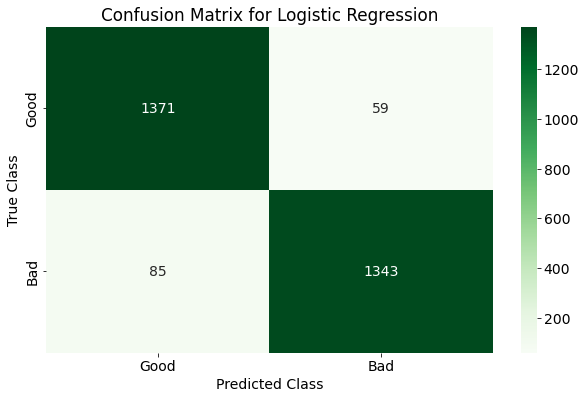

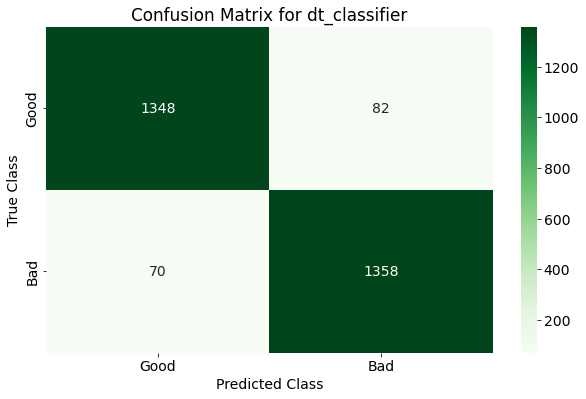

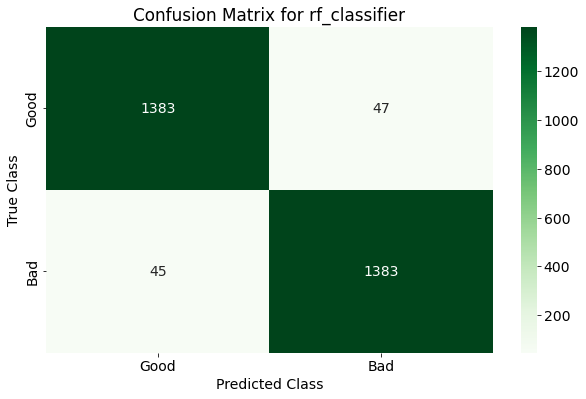

In [165]:
results("SVC" , svc_clf)
results("Logistic Regression" , log_clf)
results("dt_classifier" , deci_clf)
results("rf_classifier" , pipeline_randomforest)

## Conclusion

From the obtained results of the above models, Random Forest Classifier has highest model performance of 97.0%. 

## Next Steps

This project can be further extended to creation of browser extention or developed a GUI which takes the URL and predicts it's nature i.e., legitimate or phishing. As of now, I am working towards the creation of browser extention for this project. And may even try the GUI option also

## Saving Pickel file

In [167]:
import pickle
file = 'model.pkl'
pickle.dump(pipeline_randomforest, open(file, 'wb'))

In [ ]:
load_model = pickle.load(open(file, 'rb'))

In [ ]:
y_pred = load_model.predict(X_test)

In [ ]:
y_pred

In [59]:
df1.columns

In [ ]:
#row = X_test.iloc[1:2] 

In [ ]:
#x = pd.DataFrame(row)
#x

In [ ]:
#y = load_model.predict(x)

In [ ]:
#y

In [ ]:
data=[{
    'url': "https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/"  
}]
df11 = pd.DataFrame(data)

In [60]:
df11

,url
0,https://www.geeksforgeeks.org/different-ways-t...


In [62]:
df11["parsed_url"] = df11.url.apply(parse_url)
df11

,url,parsed_url
0,https://www.geeksforgeeks.org/different-ways-t...,"{'scheme': 'https', 'netloc': 'www.geeksforgee..."


In [63]:
df11 = pd.concat([
    df11.drop(['parsed_url'], axis=1),
    df11['parsed_url'].apply(pd.Series)
], axis=1)
df11

,url,scheme,netloc,path,params,query,fragment
0,https://www.geeksforgeeks.org/different-ways-t...,https,www.geeksforgeeks.org,/different-ways-to-create-pandas-dataframe/,,,


In [73]:
df11["is_ip"] = df11.netloc.str.match(r"\d+\.\d+\.\d+\.\d+")
df11['nb_qm'] = len( re.findall('['?']', data.url))
df11['domain_hyphens'] = df11.netloc.str.count('-')
df11['domain_underscores'] = df11.netloc.str.count('_')
df11['path_hyphens'] = df11.path.str.count('-')
df11['path_underscores'] = df11.path.str.count('_')
df11['slashes'] = df11.path.str.count('/')
df11['full_stops'] = df11.path.str.count('.')
df11['num_subdomains'] = df11['netloc'].apply(lambda net: get_num_subdomains(net))
df11['domain_tokens'] = df11['netloc'].apply(lambda net: tokenize_domain(net))
df11['path_tokens'] = df11['path'].apply(lambda path: " ".join(map(str,tokenizer.tokenize(path))))


SyntaxError: invalid syntax (<ipython-input-73-214ba601d069>, line 2)

In [65]:
df11

,url,scheme,netloc,path,params,query,fragment,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
0,https://www.geeksforgeeks.org/different-ways-t...,https,www.geeksforgeeks.org,/different-ways-to-create-pandas-dataframe/,,,,False,0,0,5,0,2,43,1,www geeksforgeeks,different ways to create pandas dataframe


In [67]:
pipeline_randomforest.predict([df11])

KeyError: 0